In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv("adbudget_sales.csv")
df.tail()

,index,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [27]:
df.isna().sum()

index                      0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [28]:
df = df.iloc[:, 1:]

df = df.rename(
    columns={
        "TV Ad Budget ($)": "TV",
        "Radio Ad Budget ($)": "Radio",
        "Newspaper Ad Budget ($)": "Newspaper",
        "Sales ($)": "Sales"
    }
)

df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [29]:
corr_TV = df["Sales"].corr(df["TV"])
corr_TV

np.float64(0.7822244248616066)

In [30]:
corr_newspp = df["Sales"].corr(df["Newspaper"])
corr_newspp

np.float64(0.22829902637616534)

In [31]:
corr_radio = df["Sales"].corr(df["Radio"])
corr_radio

np.float64(0.5762225745710552)

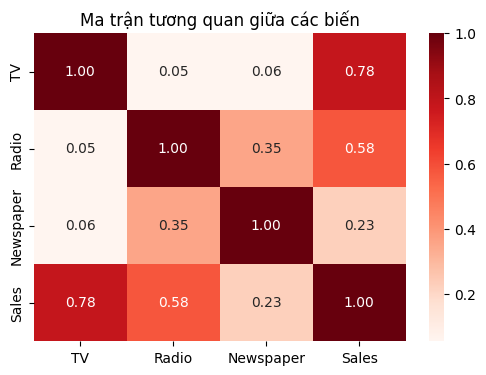

In [32]:
plt.figure(figsize=(6, 4))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds, fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()

In [38]:
#tao mo hinh TV
model = LinearRegression()

X = df[["TV"]]
y = df["Sales"]

#chia tap train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model.fit(X_train, y_train)

model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
# tao duong hoi quy
y_pred = model.predict(X_test)
y_pred

array([16.52380688,  7.39507339, 13.70158329, 21.02293388, 20.87312406,
       15.31083065, 19.66981298,  8.75785943, 13.46478714, 10.62323325,
       15.9100699 , 17.63046648, 15.19968143, 13.88038856, 12.28080635,
       10.52174918, 14.92422468, 18.0074073 ,  7.38057566, 10.58457265,
       12.82205471, 18.9980851 , 16.3111736 , 19.09956917, 17.7222854 ,
        7.79134451, 10.31878104, 13.63875982,  7.88316342,  7.00846741,
       19.80995764, 11.30945885, 17.38400517, 20.7136491 , 17.35017715,
        7.83967025, 18.56315338, 18.6549723 , 13.70641587, 18.72746092])

In [45]:
# --- In thông tin mô hình ---
print("Hệ số hồi quy (slope):", model.coef_[0])
print("Hệ số chặn (intercept):", model.intercept_)
print(f"Phương trình: Sales = {model.intercept_:.2f} + {model.coef_[0]:.2f} * TV")

Hệ số hồi quy (slope): 0.04832574642247807
Hệ số chặn (intercept): 6.974639391414551
Phương trình: Sales = 6.97 + 0.05 * TV


In [43]:
# --- Danh gia mo hinh ---
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mse: {mse:.4f}')
print(f'r2: {r2:.4f}')

comparison = pd.DataFrame({"Thực tế:": y_test, "Dự đoán": y_pred})
print(comparison.head())

mse: 11.6887
r2: 0.5747
     Thực tế:    Dự đoán
96       11.7  16.523807
5         7.2   7.395073
116      12.2  13.701583
35       12.8  21.022934
183      26.2  20.873124


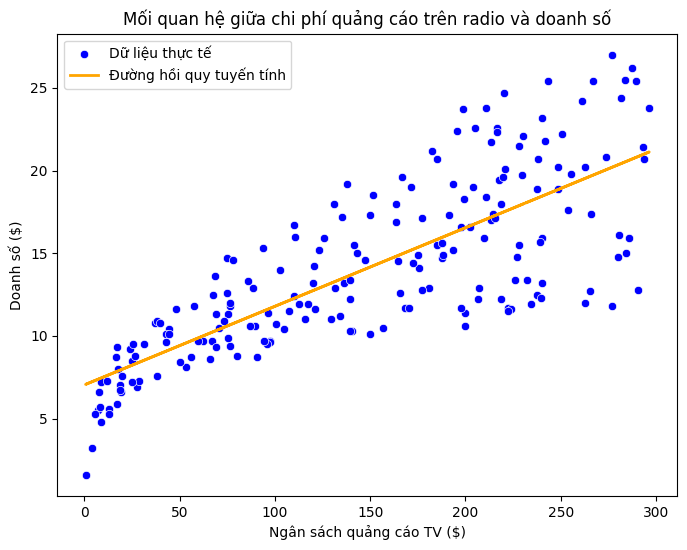

In [36]:
#ve bieu do hoi quy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X["TV"], y=y, color="blue", label="Dữ liệu thực tế")
plt.plot(X["TV"], y_pred, color="orange", linewidth = 2, label="Đường hồi quy tuyến tính")
plt.title("Mối quan hệ giữa chi phí quảng cáo trên radio và doanh số")
plt.xlabel("Ngân sách quảng cáo TV ($)")
plt.ylabel("Doanh số ($)")
plt.legend()
plt.show()

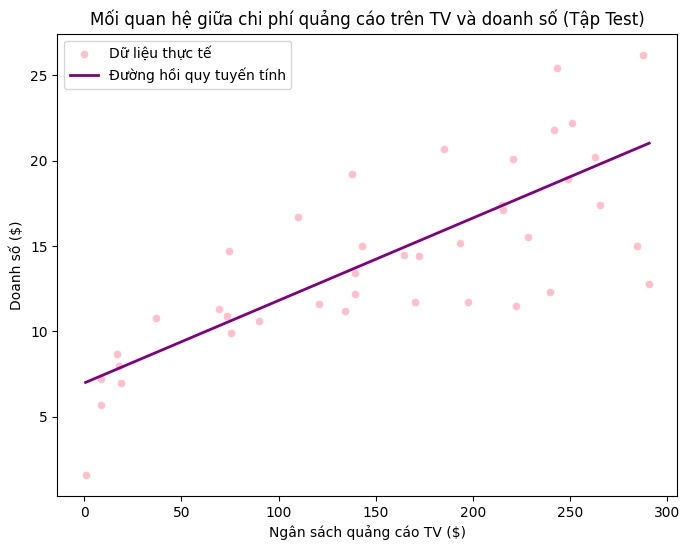

In [44]:
# Tạo DataFrame chứa giá trị thực tế và dự đoán
df_test = pd.DataFrame({
    'TV': X_test['TV'],
    'Doanh_so_thuc_te': y_test,
    'Doanh_so_du_doan': y_pred
})

# Sắp xếp theo giá trị TV để đường hồi quy mượt
df_test = df_test.sort_values(by='TV')

# Vẽ biểu đồ
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x='TV', y='Doanh_so_thuc_te',
    data=df_test, color='pink', label='Dữ liệu thực tế'
)
plt.plot(
    df_test['TV'], df_test['Doanh_so_du_doan'],
    color='purple', linewidth=2, label='Đường hồi quy tuyến tính'
)
plt.title('Mối quan hệ giữa chi phí quảng cáo trên TV và doanh số (Tập Test)')
plt.xlabel('Ngân sách quảng cáo TV ($)')
plt.ylabel('Doanh số ($)')
plt.legend()
plt.show()